In [ ]:
## Instagram Explore vs Hashtag Engagement Analysis

The goal of this analysis is to identify which engagement behaviors increase the likelihood that an Instagram post is distributed via the Explore page rather than hashtag-based discovery.

Rather than focusing on raw reach, the analysis emphasizes engagement efficiency and deep interaction signals such as saves and shares.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [6]:
IG_DF = pd.read_csv("https://raw.githubusercontent.com/Hiddensensu/Instagram_Project/main/Instagram_data.csv")

In [7]:
IG_DF

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [ ]:
### Feature Engineering

To capture engagement quality, I engineered engagement-rate metrics rather than relying on raw counts. This aligns with how social platforms prioritize content that drives meaningful interaction rather than passive views.


In [ ]:
IG_DF["engagement"] = (IG_DF["Likes"] + IG_DF["Comments"] + IG_DF["Shares"] + IG_DF["Saves"])

IG_DF["engagement_rate"] = IG_DF["engagement"] / IG_DF["Impressions"]

IG_DF["Follow_rate"] = IG_DF["Follows"] / IG_DF["Impressions"]

In [9]:
IG_DF["engagement"]

0       274
1       439
2       184
3       402
4       228
       ... 
114     986
115     288
116     129
117    1721
118    1127
Name: engagement, Length: 119, dtype: int64

In [10]:
IG_DF["engagement_rate"]

0      0.069898
1      0.081387
2      0.045760
3      0.088781
4      0.090548
         ...   
114    0.071971
115    0.050253
116    0.031167
117    0.052638
118    0.030526
Name: engagement_rate, Length: 119, dtype: float64

In [11]:
IG_DF["Follow_rate"]

0      0.000510
1      0.001854
2      0.002984
3      0.001767
4      0.000000
         ...   
114    0.005839
115    0.003141
116    0.002416
117    0.006545
118    0.006176
Name: Follow_rate, Length: 119, dtype: float64

In [13]:
source_cols = ["From Home", "From Hashtags", "From Explore", "From Other"]
## Orgin Metrics of Source Datw

source_share = (IG_DF[source_cols]
                .div(IG_DF["Impressions"], axis=0)
                .mean()
                .sort_values(ascending=False)
)
## Metrics for how Algorith is surfacing content

source_share

From Home        0.509610
From Hashtags    0.318108
From Explore     0.122876
From Other       0.029767
dtype: float64

In [14]:
Metrics = ["Impressions", "From Hashtags", "From Explore", "Likes", "Saves","Shares","Profile Visits","Follows"]

IG_DF[Metrics].corr()["Follows"].sort_values(ascending=False)

## Metrics for what drives new followers

Follows           1.000000
Impressions       0.889363
Profile Visits    0.853152
From Explore      0.796019
Likes             0.746333
Saves             0.628461
From Hashtags     0.555485
Shares            0.493070
Name: Follows, dtype: float64

In [18]:
IG_DF["discovery_source"] = np.where(
    IG_DF["From Explore"] > IG_DF["From Hashtags"],
    "Explore-driven",
    "Hashtag-driven"
)

In [19]:
IG_DF["discovery_source"].value_counts()

discovery_source
Hashtag-driven    100
Explore-driven     19
Name: count, dtype: int64

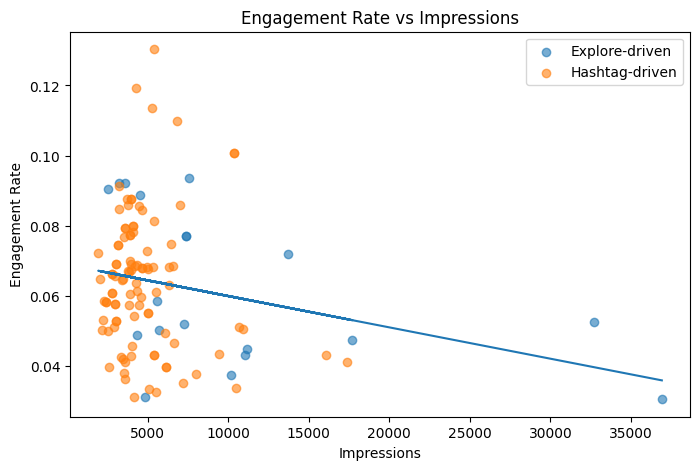

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

for source, color in zip(
    ["Explore-driven", "Hashtag-driven"],
    ["tab:blue", "tab:orange"]
):
    subset = IG_DF[IG_DF["discovery_source"] == source]
    plt.scatter(
        subset["Impressions"],
        subset["engagement_rate"],
        alpha=0.6,
        label=source
    )

plt.title("Engagement Rate vs Impressions")
plt.xlabel("Impressions")
plt.ylabel("Engagement Rate")
plt.legend()
plt.show()

In [21]:
reach_threshold = IG_DF["Impressions"].quantile(0.95)

reach_outliers = IG_DF[IG_DF["Impressions"] >= reach_threshold]

reach_outliers[[
    "Impressions",
    "From Explore",
    "From Hashtags",
    "engagement_rate",
    "Follows",
    "Caption"
]].sort_values("Impressions", ascending=False).head()

,Impressions,From Explore,From Hashtags,engagement_rate,Follows,Caption
118,36919,16444,4176,0.030526,228,175 Python Projects with Source Code solved an...
117,32695,17414,3147,0.052638,214,Here are some of the best data science certifi...
109,17713,12389,2141,0.047310,96,Here are some of the best resources to learn S...
107,17396,5192,10008,0.041101,260,Here is a list of 100+ Machine Learning Algori...
40,16062,564,11817,0.043208,94,280 Machine Learning Projects Solved & Explain...


In [22]:
engagement_threshold = IG_DF["engagement_rate"].quantile(0.95)

engagement_outliers = IG_DF[
    IG_DF["engagement_rate"] >= engagement_threshold
]

engagement_outliers[[
    "Impressions",
    "engagement_rate",
    "From Hashtags",
    "From Explore",
    "Follows",
    "Caption"
]].sort_values("engagement_rate", ascending=False).head()

,Impressions,engagement_rate,From Hashtags,From Explore,Follows,Caption
99,5409,0.130338,2006,1068,14,Here is a complete roadmap to data science tha...
45,4298,0.119358,969,181,4,Here are some of the best Python project ideas...
81,5273,0.113598,2003,433,10,Here is a complete roadmap to data science tha...
108,6814,0.109774,2769,900,16,Here are some of the best websites that you ca...
49,10386,0.100616,3551,2355,38,Here are some of the best websites that you ca...


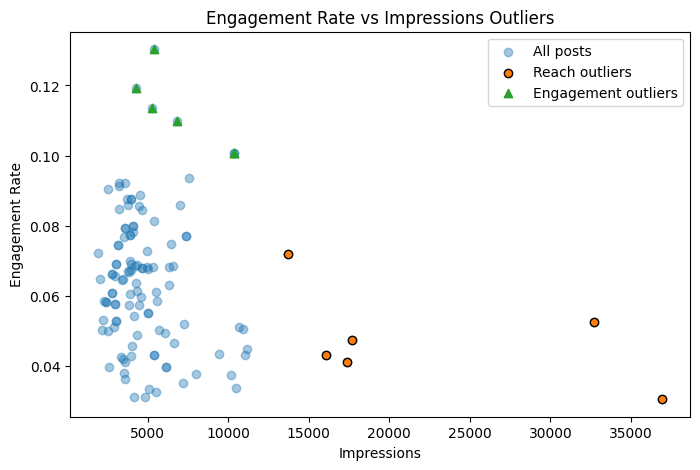

In [23]:
plt.figure(figsize=(8,5))

plt.scatter(
    IG_DF["Impressions"],
    IG_DF["engagement_rate"],
    alpha=0.4,
    label="All posts"
)

plt.scatter(
    reach_outliers["Impressions"],
    reach_outliers["engagement_rate"],
    label="Reach outliers",
    edgecolors="black"
)

plt.scatter(
    engagement_outliers["Impressions"],
    engagement_outliers["engagement_rate"],
    label="Engagement outliers",
    marker="^"
)

plt.title("Engagement Rate vs Impressions Outliers")
plt.xlabel("Impressions")
plt.ylabel("Engagement Rate")
plt.legend()
plt.show()

In [ ]:
### Modeling Approach

A logistic regression model was used as an interpretable baseline to classify whether a post was Explore-driven or Hashtag-driven. ROC-AUC was selected as the evaluation metric due to class imbalance and the probabilistic nature of the task.


In [26]:
IG_DF["is_explore"] = (IG_DF["From Explore"] > IG_DF["From Hashtags"]).astype(int)

In [27]:
features = [
    "Likes",
    "Comments",
    "Shares",
    "Saves",
    "Profile Visits",
    "engagement_rate"
]

X = IG_DF[features]
y = IG_DF["is_explore"]

In [29]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [30]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        24
           1       0.50      0.17      0.25         6

    accuracy                           0.80        30
   macro avg       0.66      0.56      0.57        30
weighted avg       0.76      0.80      0.76        30

ROC AUC: 0.763888888888889


In [31]:
coeffs = pd.Series(
    model.named_steps["logreg"].coef_[0],
    index=features
).sort_values()

coeffs

engagement_rate   -0.562073
Likes             -0.213592
Comments          -0.073938
Profile Visits    -0.014959
Shares             0.116781
Saves              0.997199
dtype: float64

In [32]:
IG_DF["explore_probability"] = model.predict_proba(X)[:,1]

IG_DF[[
    "Impressions",
    "From Explore",
    "From Hashtags",
    "explore_probability",
    "Caption"
]].sort_values("explore_probability", ascending=False).head()

,Impressions,From Explore,From Hashtags,explore_probability,Caption
117,32695,17414,3147,0.997518,Here are some of the best data science certifi...
118,36919,16444,4176,0.927220,175 Python Projects with Source Code solved an...
109,17713,12389,2141,0.789727,Here are some of the best resources to learn S...
114,13700,5352,3041,0.769948,Here are some of the best data science certifi...
49,10386,2355,3551,0.762501,Here are some of the best websites that you ca...


In [ ]:
### Limitations and Next Steps

This analysis uses static post-level data and does not capture early engagement dynamics. With access to time-based features, future iterations could model Explore probability using non-linear methods such as gradient boosting.
